In [25]:
%matplotlib widget
%config InlineBackend.figure_format='retina'

import ipympl
import numpy as np
print(ipympl.__version__)
import matplotlib
print(matplotlib.__version__)

import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as mpatches

0.5.6
3.3.0rc1


In [26]:
arr = np.tile(np.arange(13),10).reshape(10,13)

In [27]:
arr

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])

In [28]:
layout = [['image', 'lines'], 
          ['gbar', 'sbar']]
fig,  axes = plt.subplot_mosaic(layout, figsize=(4, 4), gridspec_kw={'width_ratios':[1,2]})

im = axes['image'].imshow(arr, origin='lower')

_ = axes['lines'].plot(arr) #rows are observations, columns variables
for i, row in enumerate(arr):
    _ = axes['gbar'].bar(np.arange(row.shape[0]) + (i/arr.shape[0]), row, 
                      width=(1/(arr.shape[0]))) 
    
bottom = np.zeros(row.shape)
for i, row in enumerate(arr):
    _ = axes['sbar'].bar(np.arange(row.shape[0]), row, bottom=bottom)
    bottom+=row
    
fig.colorbar(im, ax=axes['image'], fraction=.035)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [29]:
plt.close('all')

In [30]:
%reload_ext autoreload
%autoreload 2

In [31]:
import matplottoy.datasources.array as da
import matplottoy.artists.artists as ap

In [32]:
dsa = da.DataSourceArray(arr, transpose=False)

In [33]:
layout = [['image', 'lines'], 
          ['gbar', 'sbar']]
fig,  axes = plt.subplot_mosaic(layout, figsize=(4, 4), gridspec_kw={'width_ratios':[1,2]})

im = ap.Image(axes['image'], dsa)
axes['image'].add_image(im) #inside imshow
axes['image'].set_aspect('equal') #inside imshow
fig.colorbar(im, ax=axes['image'], fraction=.045)

line = ap.Line(dsa)
axes['lines'].add_artist(line)
axes['lines'].set_xlim(0,dsa.data.shape[0]-1)
axes['lines'].set_ylim(0,dsa.data.shape[1]-1)

bars = ap.Bar(dsa)
axes['gbar'].add_artist(bars)
axes['gbar'].set_xlim(0,dsa.data.shape[0]-1)
axes['gbar'].set_ylim(0,dsa.data.shape[1]-1)

bars = ap.Bar(dsa, stacked=True)
axes['sbar'].add_artist(bars)
axes['sbar'].set_xlim(0,dsa.data.shape[0]-1)
axes['sbar'].set_ylim(0, np.round(dsa.data.sum(axis=1).max(), -1))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(0.0, 80.0)

In [34]:
dsa.data = arr.T
np.random.shuffle(dsa.data)
fig.canvas.draw_idle()

In [48]:
arr.shape

(10, 13)

In [49]:
dsa = da.DataSourceArray(arr, transpose=False)

In [50]:
dsa.data.shape

(10, 13)

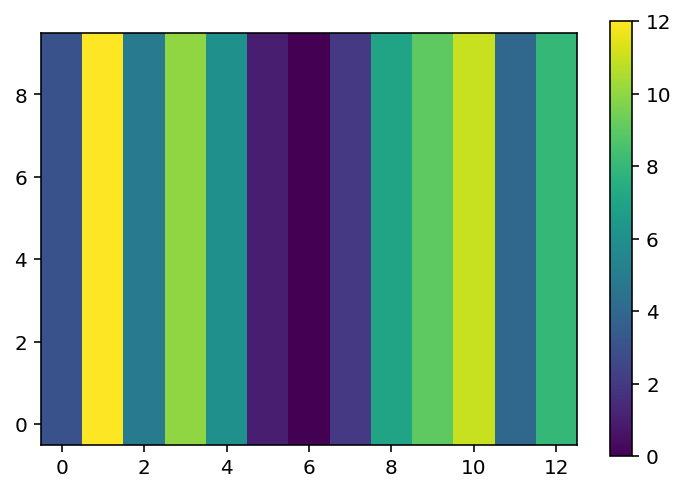

In [57]:
%matplotlib inline
fig, axd = plt.subplot_mosaic([['im']])
im = axd['im'].imshow(arr, origin='lower')
#axd['im'].set_axis_off()
fig.colorbar(im, ax=axd['im'])

fig.savefig("im.png")

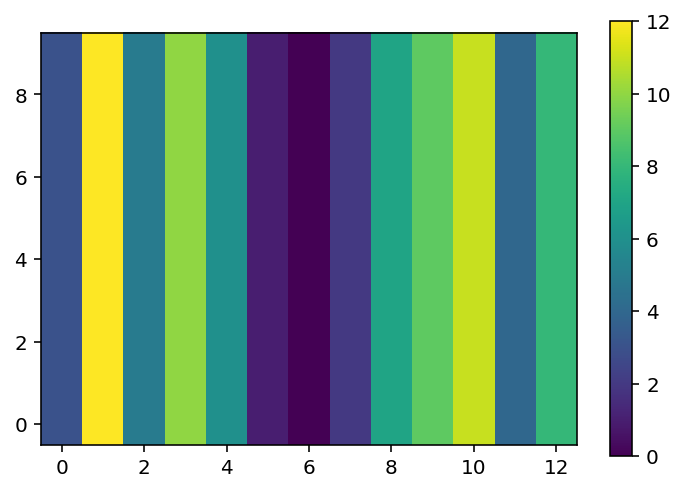

In [54]:
%matplotlib inline
fig, axd = plt.subplot_mosaic([['imds']])
imd = ap.Image(axd['imds'], dsa, origin='lower')
axd['imds'].add_image(imd) #inside imshow
axd['imds'].set_aspect('equal') #inside imshow
#axd['imds'].set_axis_off()
fig.colorbar(imd, ax=axd['imds'])
fig.savefig("imd.png")

In [60]:
axd['im'].get_window_extent()

In [61]:
im.get_extent()

(-0.5, 12.5, -0.5, 9.5)

In [62]:
im.zorder

0

In [65]:
im.get_window_extent().bounds

(53.99999999999999, 41.704615384615366, 267.84000000000003, 206.0307692307693)